In [17]:
# Import required libraries

import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import L2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

import preprocess_data

In [18]:
df = pd.read_csv('data.csv')

In [19]:
# Print first 2 rows
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [20]:
# Split train.csv in train, test dataset

X = X = preprocess_data.get_data()
X = X.drop('Survived', axis=1).astype(float)
y = df[['Survived']].astype(float)
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2)

In [21]:
X.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0


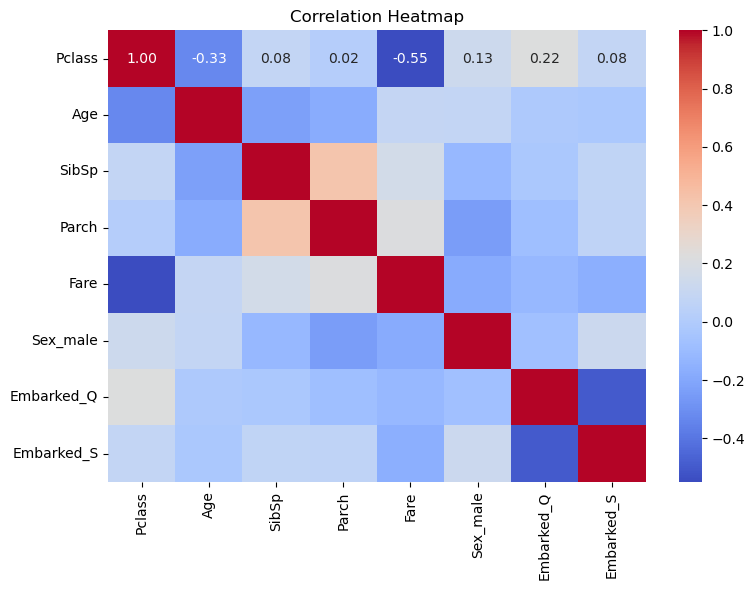

In [22]:
# Create subplots
fig, axes = plt.subplots(figsize=(8, 6))

# Correlation heatmap
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes)
axes.set_title('Correlation Heatmap')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
# Prepare model using neural network

def prepare_model(X_train, y_train):
    model = Sequential([
        tf.keras.Input(shape=(8,)),
        Dense(units=36, activation='relu'),
        Dense(units=18, activation='relu'),
        Dense(units=1, activation='sigmoid', kernel_regularizer=L2(0.01))
    ], name='my_model'
    )

    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(0.001),
    )

    model.fit(
        X_train, y_train,
        epochs=100,
        verbose=1
    )
    return model

model = prepare_model(X_train, y_train)

Epoch 1/100
23/23 [==============================] - 1s 5ms/step - loss: 2.0480
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7309
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6367
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 0.6225
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.6155
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5970
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5884
Epoch 8/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5866
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5811
Epoch 10/100
23/23 [==============================] - 0s 12ms/step - loss: 0.5930
Epoch 11/100
23/23 [==============================] - 0s 8ms/step - loss: 0.5596
Epoch 12/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5681
Epoch 13/100
23/23 [================

In [24]:
# Convert the probability predictions to binary predictions based on a threshold (0.5)
y_pred_prob = model.predict(X_cv)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Convert the true labels to int
y_true = y_cv.values.astype(int)

6/6 [==============================] - 0s 4ms/step


In [25]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print a classification report for more detailed metrics
report = classification_report(y_true, y_pred)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[109   8]
 [ 19  43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       117
           1       0.84      0.69      0.76        62

    accuracy                           0.85       179
   macro avg       0.85      0.81      0.83       179
weighted avg       0.85      0.85      0.85       179



In [26]:
# Accuracy percentage

acc = accuracy_score(y_true, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 84.91620111731844
